In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import os
from PIL import Image
import pathlib

import os

In [2]:
print(tf.__version__)

2.11.0


In [3]:
import pathlib
main_path = "C:/Users/Hp/Desktop/chest_xray/train"
norm_path = pathlib.Path("C:/Users/Hp/Desktop/chest_xray/train/NORMAL")
pneu_path = pathlib.Path("C:/Users/Hp/Desktop/chest_xray/train/PNEUMONIA")


In [4]:
def check_duplicate_image(path):
        image_filenames = [image.name for image in  path.glob('*.jpeg')]

        filename_counts = {}

        for filename in image_filenames:
            if filename in filename_counts:
                filename_counts[filename] += 1
            else:
                filename_counts[filename] = 1

        duplicate_filenames = [filename for filename, count in filename_counts.items() if count > 1]

        if duplicate_filenames:
            print("Duplicate image filenames:")
            for duplicate_filename in duplicate_filenames:
                print(duplicate_filename)
        else:
            print("No duplicate image filenames .")


In [5]:
print(check_duplicate_image(norm_path))
print(check_duplicate_image(pneu_path))

No duplicate image filenames .
None
No duplicate image filenames .
None


In [6]:
def differnt_type_image(path):
    subdirectories = [subdir.name for subdir in path.glob('*') if subdir.is_dir()]

    num_image_types = len(subdirectories)

    print("Number of different types of images:", num_image_types)
    print("Types of images:", subdirectories)

In [7]:
print(differnt_type_image(norm_path))
print(differnt_type_image(pneu_path))

Number of different types of images: 0
Types of images: []
None
Number of different types of images: 0
Types of images: []
None


In [8]:
def plot_distribation_width_height(widths , heights ):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Widths')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Heights')

    plt.tight_layout()
    plt.show()


In [9]:
def plot_bytes_distrubation(image_sizes):
    plt.hist(image_sizes, bins=20, color='red', alpha=0.7)
    plt.xlabel('Image Size (Bytes)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sizes (Bytes)')

In [10]:
train_data = [norm_path , pneu_path ]

In [11]:
train_widths = []
train_hieghts = []
train_Imgsize = []

for path in train_data:
    image_files = list(path.glob('**/*.jpeg'))

    widths = []
    heights = []
    image_sizes = []
    
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        image_sizes.append(size_bytes)
        with Image.open(image_file) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            

    train_widths.append(widths)
    train_hieghts.append(heights)
    train_Imgsize.append(image_sizes)

# NORMAL images

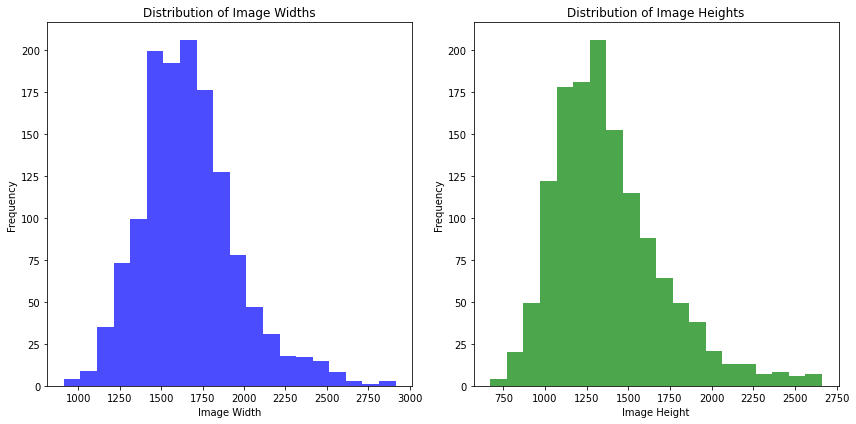

In [12]:
plot_distribation_width_height(train_widths[0] , train_hieghts[0] , )

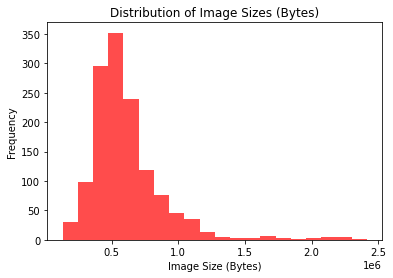

In [13]:
plot_bytes_distrubation(train_Imgsize[0])

# Pneumonia

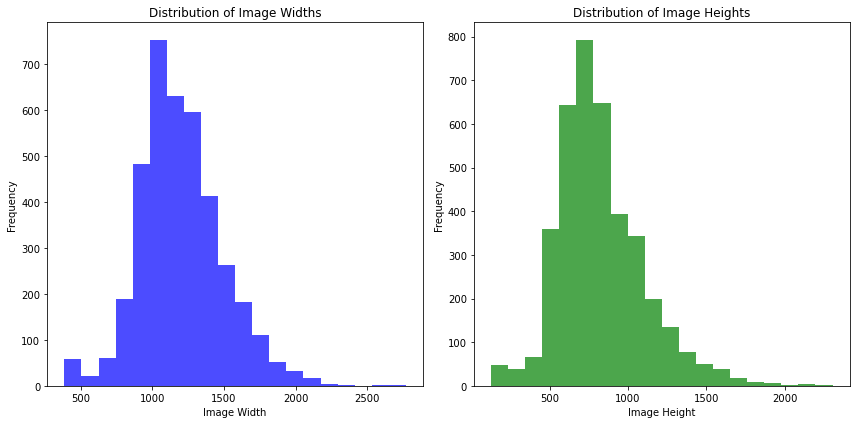

In [14]:
plot_distribation_width_height(train_widths[1] , train_hieghts[1]  )

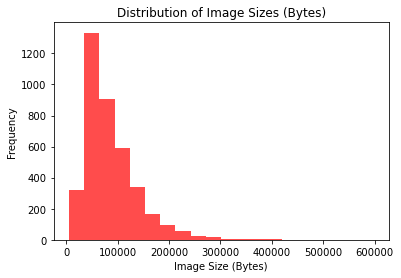

In [15]:
plot_bytes_distrubation(train_Imgsize[1])

In [16]:
train_widths = []
train_heights = []
train_Imgsize = []
label_name = []
image_paths = []  # Create a list to store the image file paths

for  path in train_data:
    image_files =  list(path.glob('**/*.jpeg'))
    for image_file in image_files:
        size_bytes = os.path.getsize(image_file)
        train_Imgsize.append(size_bytes)
        relative_path = os.path.relpath(image_file, path)
        image_paths.append(path.name + "/"+ relative_path) 
        with Image.open(image_file) as img:
            width, height = img.size
            train_widths.append(width)
            train_heights.append(height)
            label_name.append( path.name )

In [17]:
import pandas as pd 
widths_df = pd.DataFrame({'Widths': train_widths})
heights_df = pd.DataFrame({'Heights': train_heights})
imgsize_df = pd.DataFrame({'ImgSize': train_Imgsize})
label_df = pd.DataFrame({'label': label_name})
imgpath_df = pd.DataFrame({'image_paths' :image_paths })
# if that's what you want.
df = pd.concat([widths_df, heights_df, imgsize_df , label_df , imgpath_df ], axis=1)

print(df.head())

   Widths  Heights  ImgSize   label               image_paths
0    2090     1858   870784  NORMAL  NORMAL/IM-0115-0001.jpeg
1    1422     1152   406305  NORMAL  NORMAL/IM-0117-0001.jpeg
2    1810     1434   582639  NORMAL  NORMAL/IM-0119-0001.jpeg
3    1618     1279   471556  NORMAL  NORMAL/IM-0122-0001.jpeg
4    1600     1125   451292  NORMAL  NORMAL/IM-0125-0001.jpeg


In [18]:
df['Aspect_Ratio'] =  round(widths_df['Widths'] / heights_df['Heights'] , 2 ) 

In [19]:
df

,Widths,Heights,ImgSize,label,image_paths,Aspect_Ratio
0,2090,1858,870784,NORMAL,NORMAL/IM-0115-0001.jpeg,1.12
1,1422,1152,406305,NORMAL,NORMAL/IM-0117-0001.jpeg,1.23
2,1810,1434,582639,NORMAL,NORMAL/IM-0119-0001.jpeg,1.26
3,1618,1279,471556,NORMAL,NORMAL/IM-0122-0001.jpeg,1.27
4,1600,1125,451292,NORMAL,NORMAL/IM-0125-0001.jpeg,1.42
...,...,...,...,...,...,...
5211,1414,882,103815,PNEUMONIA,PNEUMONIA/person99_virus_183.jpeg,1.60
5212,1256,696,73449,PNEUMONIA,PNEUMONIA/person9_bacteria_38.jpeg,1.80
5213,1152,856,76555,PNEUMONIA,PNEUMONIA/person9_bacteria_39.jpeg,1.35
5214,1248,728,70110,PNEUMONIA,PNEUMONIA/person9_bacteria_40.jpeg,1.71


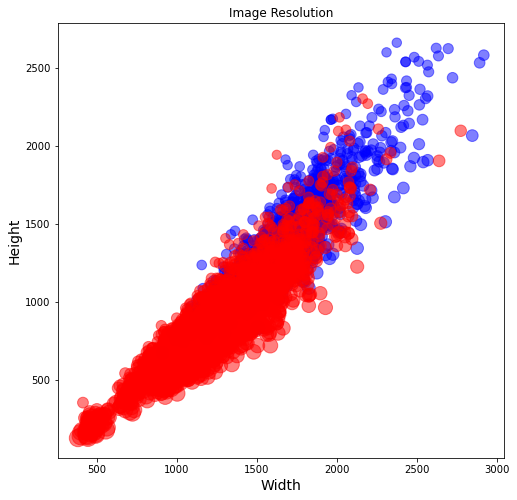

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Define colors based on the 'label' column (0 or 1)
colors = np.where(df['label'] == "NORMAL", 'blue', 'red')

points = ax.scatter(df.Widths, df.Heights, color=colors, alpha=0.5, s=df["Aspect_Ratio"] * 100, picker=True)

ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.show()


In [21]:
df['label'].value_counts()

PNEUMONIA    3875
NORMAL       1341
Name: label, dtype: int64

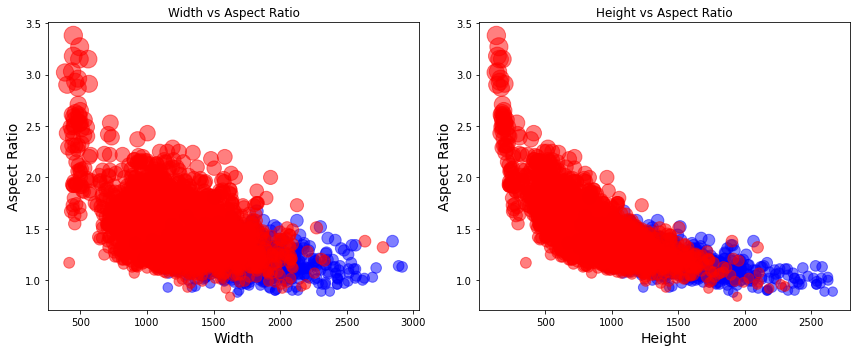

In [22]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one for width and one for height)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Width
ax1.scatter(df.Widths, df.Aspect_Ratio, color=colors, alpha=0.5, s=df["Aspect_Ratio"] * 100)
ax1.set_title("Width vs Aspect Ratio")
ax1.set_xlabel("Width", size=14)
ax1.set_ylabel("Aspect Ratio", size=14)

# Plot Height
ax2.scatter(df.Heights, df.Aspect_Ratio, color=colors, alpha=0.5, s=df["Aspect_Ratio"] * 100)
ax2.set_title("Height vs Aspect Ratio")
ax2.set_xlabel("Height", size=14)
ax2.set_ylabel("Aspect Ratio", size=14)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

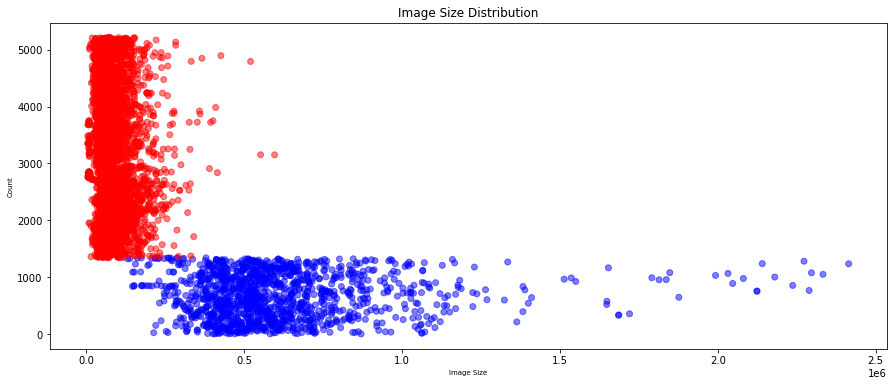

In [23]:
# Group by 'ImgSize' and count occurrences
size_counts = df.groupby('ImgSize').size().reset_index(name='Count')

# Scatter plot
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

# Define colors based on the 'label' column (0 or 1)
colors = np.where(df['label'] == "NORMAL", 'blue', 'red')

ax.scatter( df.ImgSize ,  df.index , color=colors, alpha=0.5)
ax.set_title("Image Size Distribution")
ax.set_xlabel("Image Size", size=7)
ax.set_ylabel("Count", size=7)


# Delete images bigger then 1M 2k 

In [24]:
# Delete images bigger then 1M 2k
count = len(df[df["ImgSize"] >  1200000 ] )
print(count)

42


# Delete images bigger then low then 10k 

In [25]:
count = len(df[(df['label'] == "PNEUMONIA") & (df["ImgSize"] <  10000 )])
print(count)

41


# See the mean of mean size of normal and pneumoia 

In [26]:
import matplotlib.pyplot as plt

pneumonia_mean = df[df['label'] == 'PNEUMONIA'][['Widths', 'Heights']].mean()
pneumonia_std = df[df['label'] == 'PNEUMONIA'][['Widths', 'Heights']].std()

normal_mean = df[df['label'] == 'NORMAL'][['Widths', 'Heights']].mean()
normal_std = df[df['label'] == 'NORMAL'][['Widths', 'Heights']].std()

In [27]:
print( pneumonia_mean ,  pneumonia_std )

Widths     1200.483613
Heights     825.026839
dtype: float64 Widths     291.305676
Heights    277.073758
dtype: float64


In [28]:
print( normal_mean ,  normal_std ) 

Widths     1667.734526
Heights    1381.431022
dtype: float64 Widths     289.210512
Heights    326.320734
dtype: float64


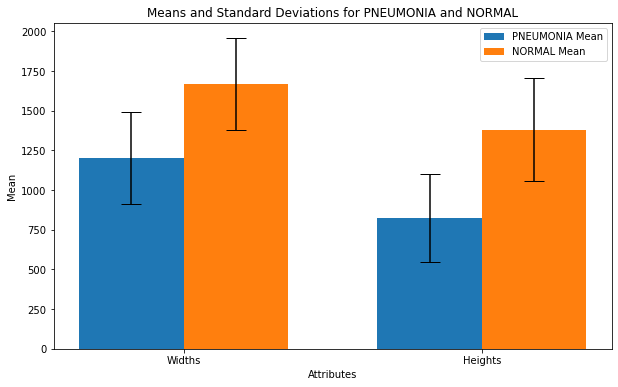

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Widths', 'Heights']
width = 0.35
x = range(len(labels))

ax.bar(x, pneumonia_mean, width, label='PNEUMONIA Mean', yerr=pneumonia_std, capsize=10)
ax.bar([i + width for i in x], normal_mean, width, label='NORMAL Mean', yerr=normal_std, capsize=10)

ax.set_xlabel('Attributes')
ax.set_ylabel('Mean')
ax.set_title('Means and Standard Deviations for PNEUMONIA and NORMAL')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


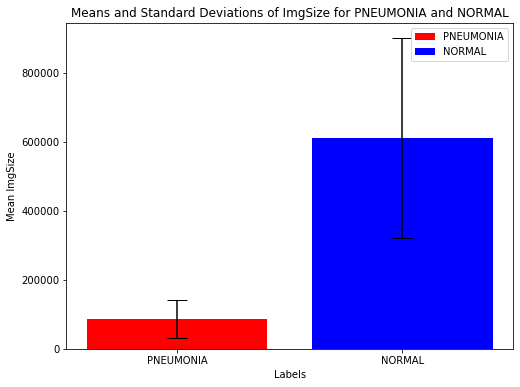

In [30]:
import matplotlib.pyplot as plt

pneumonia_mean_imgsize = df[df['label'] == "PNEUMONIA"]['ImgSize'].mean()
pneumonia_std_imgsize = df[df['label'] == "PNEUMONIA"]['ImgSize'].std()

normal_mean_imgsize = df[df['label'] == "NORMAL"]['ImgSize'].mean()
normal_std_imgsize = df[df['label'] == "NORMAL"]['ImgSize'].std()

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(0, pneumonia_mean_imgsize, yerr=pneumonia_std_imgsize, capsize=10, color='red', label='PNEUMONIA')
ax.bar(1, normal_mean_imgsize, yerr=normal_std_imgsize, capsize=10, color='blue', label='NORMAL')

ax.set_xlabel('Labels')
ax.set_ylabel('Mean ImgSize')
ax.set_title('Means and Standard Deviations of ImgSize for PNEUMONIA and NORMAL')
ax.set_xticks([0, 1])
ax.set_xticklabels(['PNEUMONIA', 'NORMAL'])
ax.legend()

plt.show()


In [31]:
df[( df['label'] == "PNEUMOIA") ] ['label'].mean()

nan

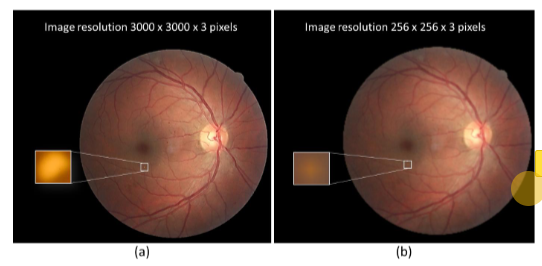

https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05

https://www.researchgate.net/publication/332241609_IMPACT_OF_IMAGE_SIZE_ON_ACCURACY_AND_GENERALIZATION_OF_CONVOLUTIONAL_NEURAL_NETWORKS/link/5fa7a715299bf10f732fdc1c/download

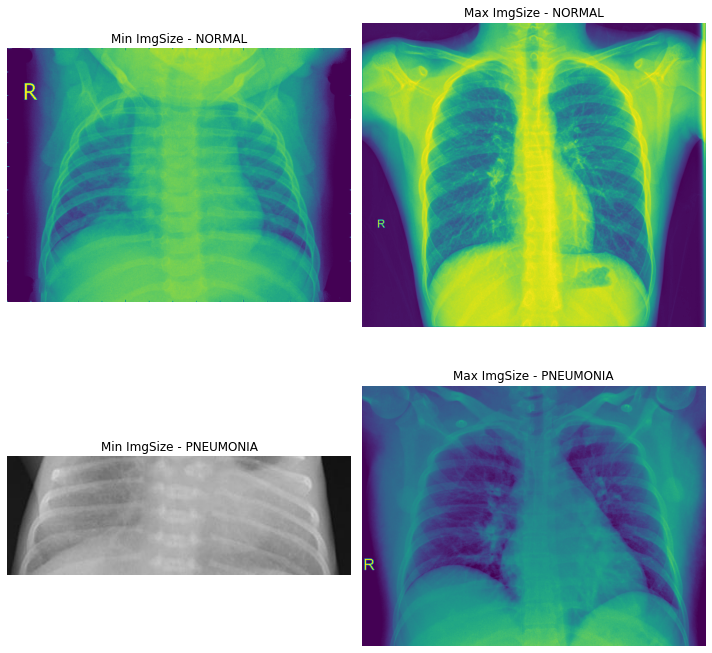

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset

# Filter rows for 'NORMAL' and 'PNEUMONIA' labels
normal_rows = df[df['label'] == 'NORMAL']
pneumonia_rows = df[df['label'] == 'PNEUMONIA']

# Find rows with the minimum and maximum 'ImgSize' values for each label
min_normal_row = normal_rows[normal_rows['ImgSize'] == normal_rows['ImgSize'].min()]
max_normal_row = normal_rows[normal_rows['ImgSize'] == normal_rows['ImgSize'].max()]
min_pneumonia_row = pneumonia_rows[pneumonia_rows['ImgSize'] == pneumonia_rows['ImgSize'].min()]
max_pneumonia_row = pneumonia_rows[pneumonia_rows['ImgSize'] == pneumonia_rows['ImgSize'].max()]

# Get the image paths for these rows
min_normal_path = min_normal_row['image_paths'].values[0]
max_normal_path = max_normal_row['image_paths'].values[0]
min_pneumonia_path = min_pneumonia_row['image_paths'].values[0]
max_pneumonia_path = max_pneumonia_row['image_paths'].values[0]

# Load and plot the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(Image.open(main_path +"/"+min_normal_path))
axes[0, 0].set_title(f"Min ImgSize - NORMAL")
axes[0, 1].imshow(Image.open(main_path +"/"+max_normal_path))
axes[0, 1].set_title(f"Max ImgSize - NORMAL")
axes[1, 0].imshow(Image.open(main_path +"/"+min_pneumonia_path))
axes[1, 0].set_title(f"Min ImgSize - PNEUMONIA")
axes[1, 1].imshow(Image.open(main_path +"/"+max_pneumonia_path))
axes[1, 1].set_title(f"Max ImgSize - PNEUMONIA")

for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset

# Filter rows where 'ImgSize' is below 1000
small_img_rows = df[df['ImgSize'] < 20000 ]

# Get the image paths for these rows
small_img_paths = small_img_rows['image_paths'].values

# Plot the images
num_images_to_plot = len(small_img_paths)
num_images_to_plot

89

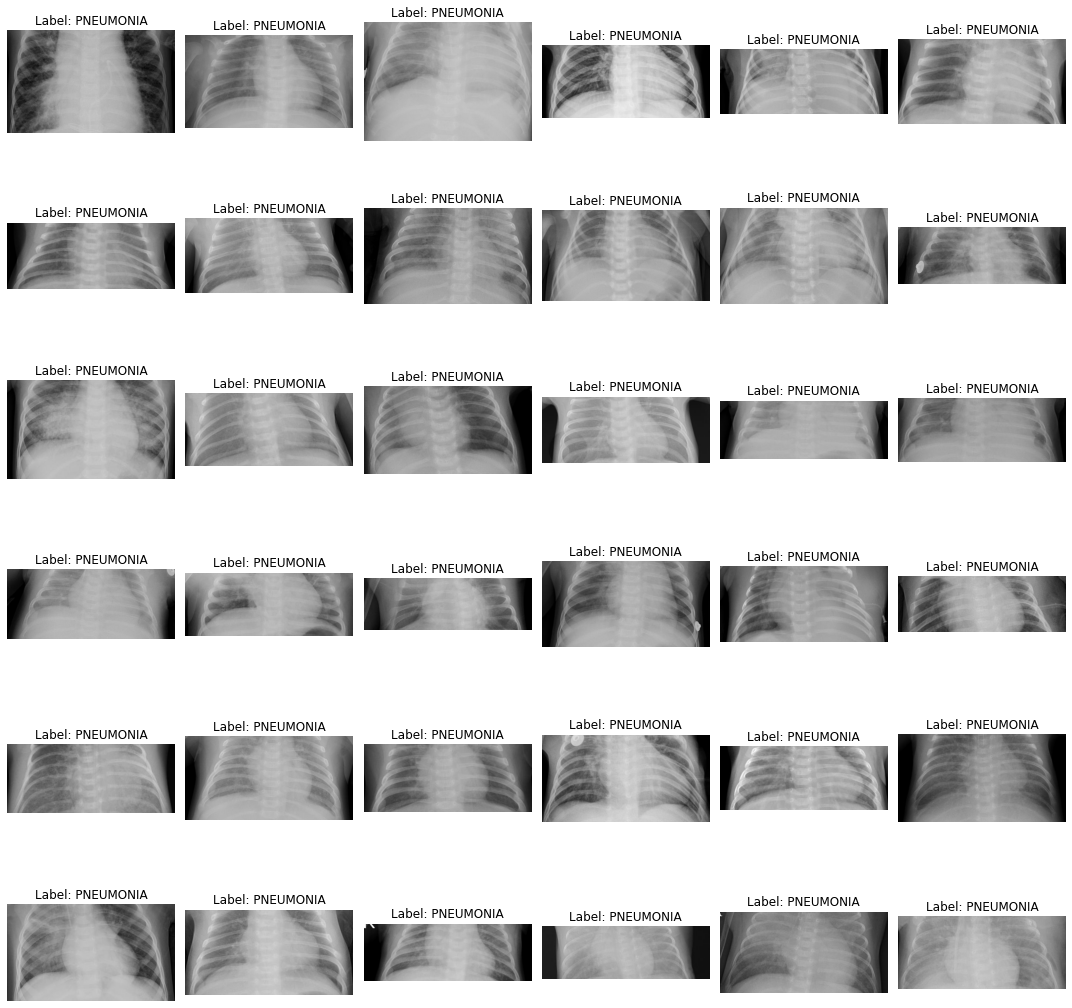

In [34]:
# Get the image paths and labels for these rows
small_img_paths = small_img_rows['image_paths'].values
small_img_labels = small_img_rows['label'].values

# Create a grid of subplots for plotting the images
num_images_to_plot = len(small_img_paths)
fig, axes = plt.subplots(6 , 6, figsize=(15, 15))

for i, (img_path, label) in enumerate(zip(small_img_paths, small_img_labels)):
    if i < 36:  # Limit to plotting the first 36 images
        row = i // 6
        col = i % 6
        img = Image.open(main_path+"/"+img_path)
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Label: {label}")
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [35]:
len(df)

5216

In [36]:
# Filter the DataFrame to keep only images with ImgSize <= 1,200,000 bytes
df2 = df[df["ImgSize"] <= 1200000]
len(df2)

5174

In [37]:
# remove_df2 = df[ df["ImgSize"] > 1200000]['image_paths']

# Delete the small_img_paths

In [38]:
df3 = df2[~df2["image_paths"].isin(small_img_rows["image_paths"].values)]

In [39]:
len(df3)

5085

In [40]:
# remove_df3 = df2[df2["image_paths"].isin(small_img_rows["image_paths"].values)]['image_paths']
# remove_df3

In [41]:
df3

,Widths,Heights,ImgSize,label,image_paths,Aspect_Ratio
0,2090,1858,870784,NORMAL,NORMAL/IM-0115-0001.jpeg,1.12
1,1422,1152,406305,NORMAL,NORMAL/IM-0117-0001.jpeg,1.23
2,1810,1434,582639,NORMAL,NORMAL/IM-0119-0001.jpeg,1.26
3,1618,1279,471556,NORMAL,NORMAL/IM-0122-0001.jpeg,1.27
4,1600,1125,451292,NORMAL,NORMAL/IM-0125-0001.jpeg,1.42
...,...,...,...,...,...,...
5211,1414,882,103815,PNEUMONIA,PNEUMONIA/person99_virus_183.jpeg,1.60
5212,1256,696,73449,PNEUMONIA,PNEUMONIA/person9_bacteria_38.jpeg,1.80
5213,1152,856,76555,PNEUMONIA,PNEUMONIA/person9_bacteria_39.jpeg,1.35
5214,1248,728,70110,PNEUMONIA,PNEUMONIA/person9_bacteria_40.jpeg,1.71


In [42]:
df3.describe()

,Widths,Heights,ImgSize,Aspect_Ratio
count,5085.000000,5085.000000,5.085000e+03,5085.000000
mean,1325.634415,969.813373,2.125065e+05,1.429099
std,327.220211,349.804016,2.397019e+05,0.226591
min,620.000000,317.000000,2.021000e+04,0.840000
25%,1064.000000,696.000000,5.765300e+04,1.260000
50%,1288.000000,893.000000,9.751800e+04,1.410000
75%,1552.000000,1184.000000,2.837700e+05,1.580000
max,2772.000000,2376.000000,1.187656e+06,2.430000


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5085 entries, 0 to 5215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Widths        5085 non-null   int64  
 1   Heights       5085 non-null   int64  
 2   ImgSize       5085 non-null   int64  
 3   label         5085 non-null   object 
 4   image_paths   5085 non-null   object 
 5   Aspect_Ratio  5085 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 278.1+ KB


In [44]:
df3['label'].value_counts()

PNEUMONIA    3786
NORMAL       1299
Name: label, dtype: int64

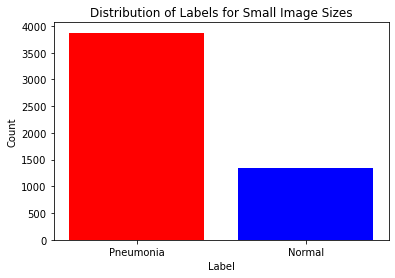

In [45]:
import matplotlib.pyplot as plt


label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values, color=['red' , 'blue' ])
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label_counts.index, ['Pneumonia' , 'Normal' ])
plt.title('Distribution of Labels for Small Image Sizes')
plt.show()


# make Upsamling for Pneumonia

In [46]:
import pandas as pd
import numpy as np

# Assuming 'df' is your original DataFrame
# Separate the data into Normal and Pneumonia classes
normal_data = df[df['label'] == 'NORMAL']
pneumonia_data = df[df['label'] == 'PNEUMONIA']

# Get the count of samples in each class
normal_count = len(normal_data)
pneumonia_count = len(pneumonia_data)

# Calculate the difference in counts
count_diff = pneumonia_count - normal_count - 800
# Calculate the difference in counts

# Randomly oversample the Normal class to match the Pneumonia class
oversampled_normal = normal_data.sample(n=count_diff, replace=True, random_state=42)

# Concatenate the oversampled Normal class with the Pneumonia class
df4 = pd.concat([pneumonia_data, oversampled_normal])

# Now 'balanced_df' contains a balanced dataset with the Normal class oversampled

# You can shuffle the dataset if needed
df4  = df4.sample(frac=1, random_state=42)

# To check the class distribution
print(df4['label'].value_counts())

PNEUMONIA    3875
NORMAL       1734
Name: label, dtype: int64


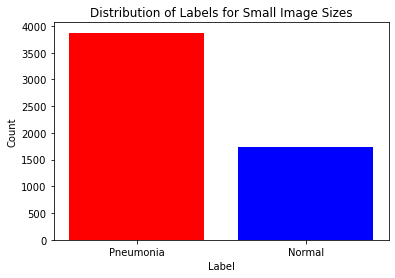

In [47]:
label_counts = df4['label'].value_counts()

plt.bar(label_counts.index, label_counts.values, color=['red' , 'blue' ])
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(label_counts.index, ['Pneumonia' , 'Normal' ])
plt.title('Distribution of Labels for Small Image Sizes')
plt.show()


In [48]:
# remove_paths = pd.concat([remove_df2, remove_df3])
# # Add main_path to the 'image_paths' column in remove_paths
# remove_paths = main_path + remove_paths

In [49]:
IMAGE_SIZE = 256    
BATCH_SIZE = 32 
main_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"

In [50]:
full_paths = [main_path + path for path in df4['image_paths']]
full_labels = [label for label in df4['label']]

# I make all visulize and some processing  and after that I dont use them I dont remove them if some one he want to look some information about the dataset it is already exists I plot all min image and max image and show the distribation of data width , height and image size

# if complete a bove uncomments this notebook below

In [51]:
# remove_paths = remove_paths  # Convert remove_paths to a list
# df5 = df3[~df3['image_paths'].isin(remove_paths)]
# len(df5)

# # Assuming df4['image_paths'] contains a list of image file paths as strings
# image_paths = main_path+ df5['image_paths'].values
# len(image_paths)
# # Create a TensorFlow dataset from the list of image paths
# list_ds = tf.data.Dataset.from_tensor_slices(image_paths)
# list_ds 

# def get_label(file_path):
#     parts = tf.strings.split(file_path, '/')
#     # Check if the second-to-last part of the path is equal to a specific class name
#     if parts[-2] == class_names[0]:
#         return 0  # Return 0 for the first class name
#     elif parts[-2] == class_names[1]:
#         return 1  # Return 1 for the second class name
#     else:
#         return -1

# def decode_img(img):
#   img = tf.image.decode_jpeg(img, channels=3) #color images
#   img = tf.image.convert_image_dtype(img, tf.float32) 
#    #convert unit8 tensor to floats in the [0,1]range
#   return tf.image.resize(img, [256, 256]) 
# #resize the image into 224*224 


# def process_path(file_path):
#   label = get_label(file_path)
#   img = tf.io.read_file(file_path)
#   img = decode_img(img)
#   return img, label

# AUTOTUNE=tf.data.experimental.AUTOTUNE
# labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# for image, label in labeled_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())
    
# def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  
#   if cache:
#     if isinstance(cache, str):
#       ds = ds.cache(cache)
#     else:
#       ds = ds.cache()
#   ds = ds.shuffle(buffer_size=shuffle_buffer_size)
# #   ds = ds.repeat() #repeat forever
#   ds = ds.batch(BATCH_SIZE)
#   ds = ds.prefetch(buffer_size=AUTOTUNE)
#   return ds

# train_ds = prepare_for_training(labeled_ds)
# image_batch, label_batch = next(iter(train_ds))

# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(image_batch[i].numpy())
#     plt.title(f"Label: {label_batch[i].numpy()}")
#     plt.axis("off")

# plt.show()


# Start work from here 

In [52]:
BATCH_SIZE = 32 
IMAGE_SIZE = 256
EPOCHS = 50
CHANNELS = 3 

In [53]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
"C:/Users/Hp/Desktop/chest_xray/train" ,
    seed=123 ,
    shuffle=True ,
    batch_size=BATCH_SIZE, 
    image_size=(IMAGE_SIZE ,IMAGE_SIZE)
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
"C:/Users/Hp/Desktop/chest_xray/val" ,
    seed=123 ,
    shuffle=True ,
    batch_size=BATCH_SIZE, 
    image_size=(IMAGE_SIZE ,IMAGE_SIZE)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
"C:/Users/Hp/Desktop/chest_xray/test" ,
    seed=123 ,
    shuffle=True ,
    batch_size=BATCH_SIZE, 
    image_size=(IMAGE_SIZE ,IMAGE_SIZE)
)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [54]:
# Access the image file paths
class_names  = test_data.class_names

class_names

['NORMAL', 'PNEUMONIA']

In [55]:
len(df4)

5609

In [56]:
for image_batch , label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [57]:
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [58]:
rescale_and_resizing = tf.keras.Sequential([
   layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE), 
    layers.experimental.preprocessing.Rescaling(1/255.),
      
])

In [59]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),            # Randomly rotate images (degrees, 0 to 180)
    layers.experimental.preprocessing.RandomZoom(0.2),                 # Randomly zoom images
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),      # Randomly shift images horizontally and vertically
    layers.experimental.preprocessing.RandomFlip("horizontal"),         # Randomly flip images horizontally
])

In [60]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [61]:
from tensorflow.keras import Sequential, layers

# Define the input shape based on your image dimensions and channels
inputShape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS )  # Replace with the actual dimensions

model1 = Sequential()

# Convolutional Layer 1
model1.add(layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=inputShape))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

# Convolutional Layer 2
model1.add(layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model1.add(layers.Dropout(0.1))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

# Convolutional Layer 3
model1.add(layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

# Convolutional Layer 4
model1.add(layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

# Convolutional Layer 5
model1.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D((2, 2), strides=2, padding='same'))

# Flatten Layer
model1.add(layers.Flatten())

# Fully Connected Layer 1
model1.add(layers.Dense(units=128, activation='relu'))
model1.add(layers.Dropout(0.2))

# Output Layer
model1.add(layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)    

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model1.fit(train_ds , batch_size=20 , validation_data=val_ds ,  epochs=10 ,callbacks = [learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 389s 2s/step - loss: 0.9405 - accuracy: 0.8117 - val_loss: 5.7878 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 360s 2s/step - loss: 0.3047 - accuracy: 0.8727 - val_loss: 1.3427 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 366s 2s/step - loss: 0.2950 - accuracy: 0.8909 - val_loss: 2.7735 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/10
 82/163 [==============>...............] - ETA: 3:00 - loss: 0.2965 - accuracy: 0.8925

In [ ]:
scores = model1.evaluate(test_ds)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
EPOCHS = 10
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model1.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model1, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

In [ ]:
model1.save("potatoes.h5")